In [110]:
import os
import warnings
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\analyse_csv.csv" 
df_final = pd.read_csv(file_path)

In [111]:
#compute the median price per square meter for each localities and add these prices to the dataframe
file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\area_analyse\square_meter_csv.csv" 
df_square_meter = pd.read_csv(file_path)
df_final = pd.merge(df_final, df_square_meter, on = 'Locality')

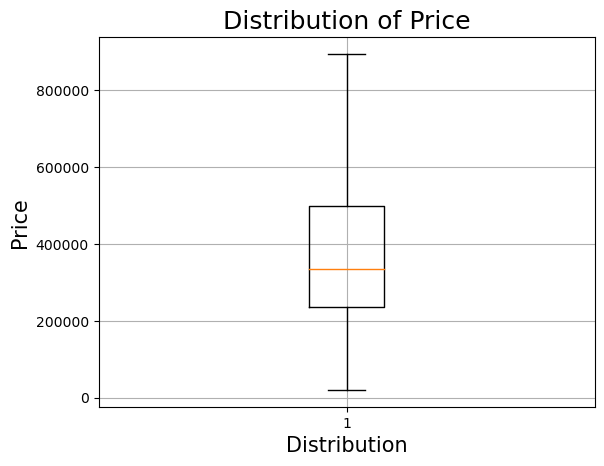

In [112]:
plt.boxplot(df_final['Price'], showfliers=False)
plt.xlabel('Distribution', fontsize=15)
plt.ylabel("Price", fontsize=15)

plt.title('Distribution of Price', fontsize=18)
plt.grid(True)

plt.show()

In [113]:
#delete outliers 
df_final = df_final[df_final['Price'] < 1000000]
print(df_final.shape)

(10841, 12)


In [114]:
#based on the Living Area of the property and the price per square meter of the locality, compute the supposed Price of the property 
df_final['Supposed_Price'] = df_final['Living_Area'] * df_final['Median_Price_Squared_Meter']

In [115]:
#get one random line for each unique Price
df_final = df_final.groupby('Price').sample()

<function matplotlib.pyplot.show(close=None, block=None)>

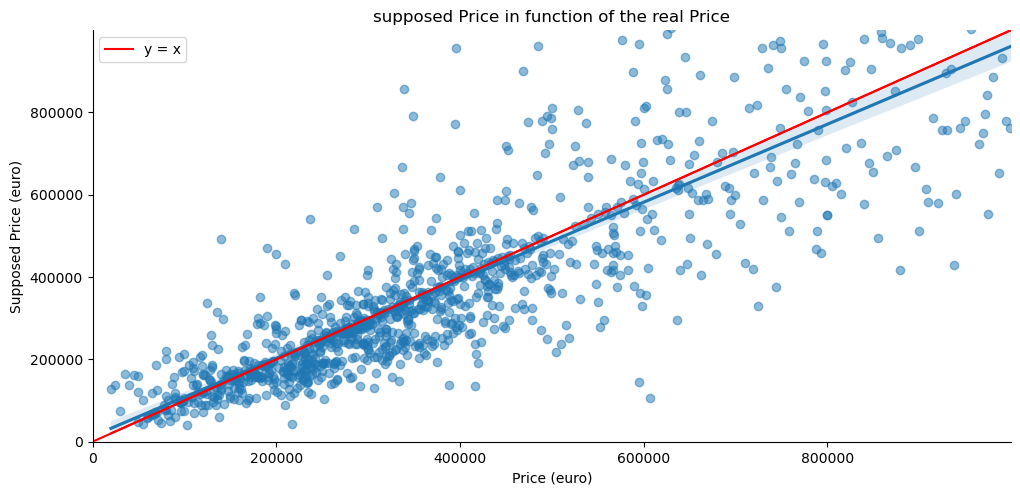

In [116]:
sns.lmplot(x="Price", y="Supposed_Price", data=df_final, scatter_kws={'alpha':0.5}, aspect=2)
sns.lineplot(x=df_final["Price"], y=df_final["Price"], label='y = x', color='red')

plt.xlabel('Price (euro)')
plt.ylabel('Supposed Price (euro)')

# Add line y=x
plt.plot([0, max(df_final["Price"])], [0, max(df_final["Price"])], 'r-', label='y = x')

plt.xlim(0, max(df_final["Price"]))
plt.ylim(0, max(df_final["Price"]))

plt.title('supposed Price in function of the real Price')

plt.savefig(r'.\images\supposed_price.png', bbox_inches='tight')
plt.show

In [117]:
#we keep tthe NAN but show they are NAN
df_final["State_of_the_building"] = df_final["State_of_the_building"].fillna("NAN")

<function matplotlib.pyplot.show(close=None, block=None)>

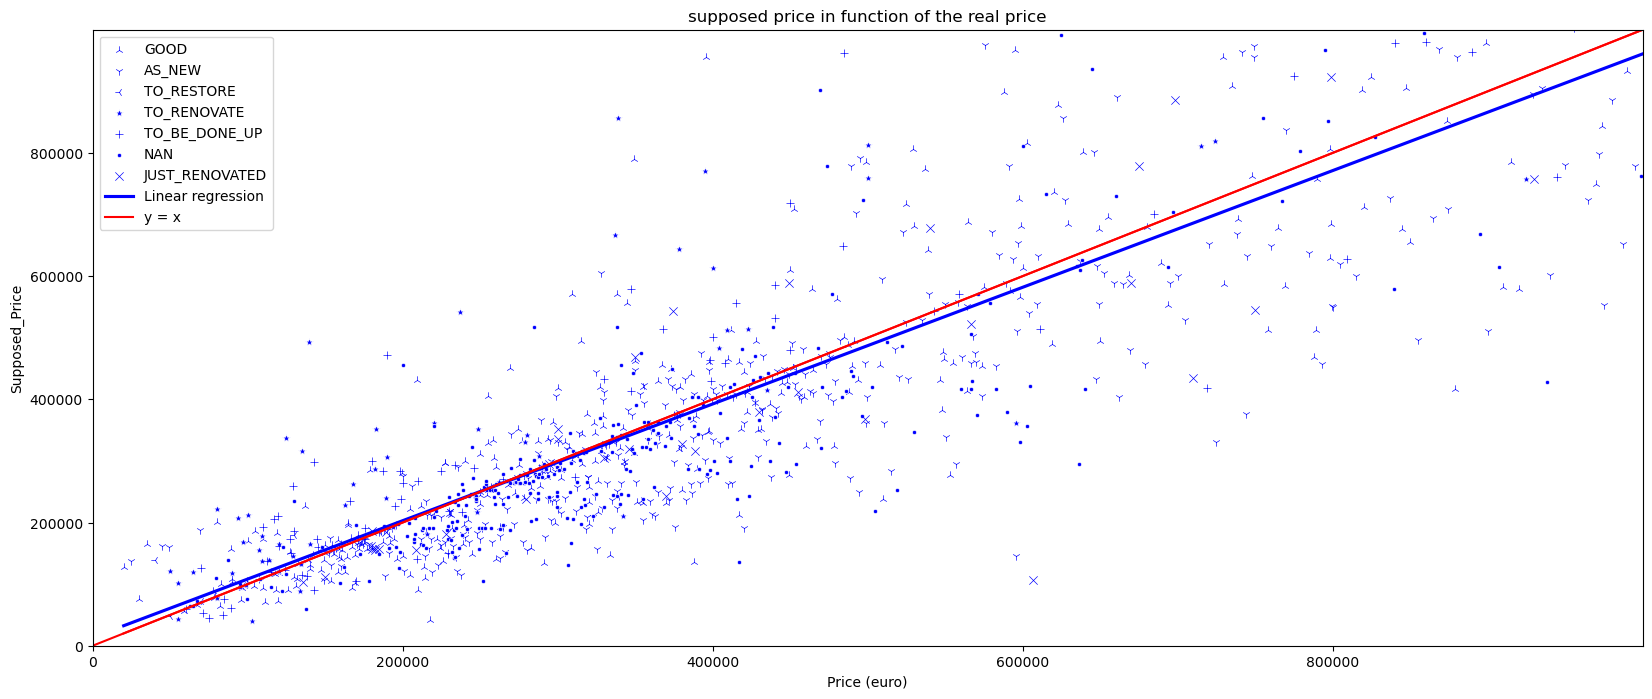

In [118]:
plt.figure(figsize=(20, 8))

markers = {'NAN': '.', 'GOOD': '2', 'JUST_RENOVATED': 'x', 'AS_NEW': '1', 'TO_BE_DONE_UP': '+', 'TO_RENOVATE':'*', 'TO_RESTORE':'3'} #put a marker = s this one will be more visible
for state in df_final['State_of_the_building'].unique():
    data = df_final[df_final['State_of_the_building'] == state]
    sns.scatterplot(x="Price", y="Supposed_Price", data=data, marker = markers[state], alpha = 1, label = state, color='blue')

#draw the linear regression
sns.regplot(x="Price", y="Supposed_Price", data=df_final, scatter=False, color='blue', ci=None, label='Linear regression')
#draw y=x (reference line)
sns.lineplot(x=df_final["Price"], y=df_final["Price"], label='y = x', color='red')

plt.xlabel('Price (euro)')
plt.ylabel('Supposed_Price')

plt.plot([0, max(df_final["Price"])], [0, max(df_final["Price"])], '-r', label='y = x')
plt.xlim(0, max(df_final["Price"]))
plt.ylim(0, max(df_final["Price"]))

plt.title('supposed price in function of the real price')

plt.savefig(r'.\images\supposed_price_state_building.png', bbox_inches='tight')
plt.show